In [1]:
import torch

# 結論: 自動微分
PyTorchを使うと自動微分ができる

In [2]:
x = torch.tensor(2.0, requires_grad=True)

In [3]:
def f(x):
    return x ** 2 + 4 * x + 3

In [4]:
y = f(x)

In [5]:
y.backward()

In [6]:
x.grad

tensor(8.)

# Tensor型

In [7]:
# 2.0というスカラを保持するTensor型のオブジェクトを作成
# (数 x = 2.0 を定義)
x = torch.tensor(2.0, requires_grad=True)
x

tensor(2., requires_grad=True)

In [8]:
# [1.0, 2.0, 3.0]というベクトルを保持するTensor型のオブジェクトを作成
# (数 x = (1.0, 2.0, 3.0) 
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
x

tensor([1., 2., 3.], requires_grad=True)

### `torch.tensor(data, requires_grad=False)`

- data: 保持するデータ(配列っぽいものならなんでも)
    リスト、タプル、NumPy配列、スカラ、...
- requires_grad: 勾配(gradient)を保持するかどうかのフラグ  
    デフォルトはFalse
    勾配の計算(自動微分)を行う場合はTrueにする

In [9]:
torch.tensor([1.0, 2.0, 3.0], requires_grad=True)

tensor([1., 2., 3.], requires_grad=True)

In [10]:
torch.tensor((1.0, 2.0, 3.0), requires_grad=True)

tensor([1., 2., 3.], requires_grad=True)

In [11]:
torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]], requires_grad=True)

tensor([[1., 2., 3.],
        [4., 5., 6.]], requires_grad=True)

# 演習1

In [12]:
# 1
x = torch.tensor(3.0, requires_grad=True)

In [13]:
# 2
x = torch.tensor([3.0, 4.0, 5.0], requires_grad=True)

In [14]:
# 3
x = torch.tensor([[3.0, 4.0, 5.0], [6.0, 7.0, 8.0]], requires_grad=True)

In [15]:
# 4
x = torch.tensor(3, requires_grad=True)

RuntimeError: Only Tensors of floating point and complex dtype can require gradients

"Only Tensors of floating point and complex dtype can require gradients"
「勾配を保持するには浮動小数点型か複素数型のTensorが必要」となり、整数型のTensorは勾配を保持できない

In [16]:
# 5
matrix = []
for i in range(10):
    row = []
    for j in range(10 * i + 1, 10 * i + 11):
        row.append(float(j))
    matrix.append(row)

x = torch.tensor(matrix, requires_grad=True)

x

tensor([[  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.],
        [ 11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.],
        [ 21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.],
        [ 31.,  32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.],
        [ 41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.],
        [ 51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.],
        [ 61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.],
        [ 71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.],
        [ 81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.],
        [ 91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99., 100.]],
       requires_grad=True)

In [17]:
# 5. 別解1
x = torch.tensor([[float(i) for i in range(10 * j + 1, 10 * j + 11)] for j in range(10)])
x

tensor([[  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.],
        [ 11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.],
        [ 21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.],
        [ 31.,  32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.],
        [ 41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.],
        [ 51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.],
        [ 61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.],
        [ 71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.],
        [ 81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.],
        [ 91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99., 100.]])

In [18]:
# 5. 別解2
x = torch.tensor(range(1, 101), dtype=torch.float).reshape(10, 10)
x

tensor([[  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.],
        [ 11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.],
        [ 21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.],
        [ 31.,  32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.],
        [ 41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.],
        [ 51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.],
        [ 61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.],
        [ 71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.],
        [ 81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.],
        [ 91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99., 100.]])

# Tensor型に対する演算

In [19]:
x = torch.tensor(2.0, requires_grad=True)

In [20]:
x + 2

tensor(4., grad_fn=<AddBackward0>)

In [21]:
x * 2

tensor(4., grad_fn=<MulBackward0>)

In [22]:
torch.sqrt(x)

tensor(1.4142, grad_fn=<SqrtBackward0>)

In [23]:
torch.sin(x)

tensor(0.9093, grad_fn=<SinBackward0>)

In [24]:
torch.exp(x)

tensor(7.3891, grad_fn=<ExpBackward0>)

# 自動微分

In [25]:
x = torch.tensor(2.0, requires_grad=True)
y = x + 2

In [26]:
# Addが記録されている！
print(y)

tensor(4., grad_fn=<AddBackward0>)


In [27]:
# 4としか記録されていない
x = 2
y = x + 2
print(y)

4


# backwardによる自動微分

$y = x + 2$のとき$\dfrac{dy}{dx} = 1$をもとめる

In [28]:
x = torch.tensor(2.0, requires_grad=True)
y = x + 2
y.backward()

In [29]:
x.grad

tensor(1.)

#### 複雑な演算の自動微分

In [30]:
x = torch.tensor(2.0, requires_grad=True)
y = y = torch.sin((x + 2) + (1 + torch.exp(x ** 2))) 
y.backward()
print(x.grad) 

tensor(-218.4625)


In [31]:
x = torch.tensor(2.0, requires_grad=True)
y = x ** 2
z = 2 * y + 3
z.backward()
print(x.grad)

tensor(8.)


In [32]:
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
y = 2 * x[0] + 3 * x[1] + 4 * x[2]
y.backward()
print(x.grad)

tensor([2., 3., 4.])


In [33]:
A = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]], requires_grad=True)
y = torch.sum(A)
y.backward()
print(A.grad) 

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [34]:
x = torch.tensor(2.0, requires_grad=True)
y = torch.tensor(3.0, requires_grad=True)
z = 2 * x + 4 * y
z.backward()
print('x.grad:', x.grad) 
print('y.grad:', y.grad) 

x.grad: tensor(2.)
y.grad: tensor(4.)


# 演習3

In [35]:
# 1
x = torch.tensor(3.0, requires_grad=True)
y = x ** 2 + 2 * x + 1
y.backward()
print(x.grad)

tensor(8.)


In [36]:
# 2
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
y = x[0] ** 2 + x[1] ** 2 + x[2] ** 2
y.backward()
print(x.grad)

tensor([2., 4., 6.])


In [37]:
# 3
W = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]], requires_grad=True)
x1 = torch.tensor([[1.0, 2.0]], requires_grad=True)
x2 = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
y = torch.matmul(torch.matmul(x1, W), x2)
y.backward()
print(W.grad)   
print(x1.grad)
print(x2.grad)

tensor([[1., 2., 3.],
        [2., 4., 6.]])
tensor([[14., 32.]])
tensor([ 9., 12., 15.])


# PyTorchによる勾配降下法

In [38]:
# これは動きません！！！！！！
lr = 0.0005

x = torch.tensor(3.0, requires_grad=True)

def f(x):
    return x ** 2 + torch.exp(-x)

for i in range(10001):
    y = f(x)
    y.backward()
    x = x - lr * x.grad

/var/folders/k0/0f8kvxl562db4z1s1j8l0v4c0000gn/T/ipykernel_62177/2685225857.py:12: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/build/aten/src/ATen/core/TensorBody.h:491.)
  x = x - lr * x.grad


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

In [39]:
# 修正版

lr = 0.0005

x = torch.tensor(3.0, requires_grad=True)

def f(x):
    return x ** 2 + torch.exp(-x)

for i in range(10001):
    y = f(x)
    y.backward()
    with torch.no_grad(): 
        x = x - lr * x.grad
    x.requires_grad = True
    if i % 1000 == 0:
        print('x:', x.item(), 'y:', y.item())


x: 2.9970247745513916 y: 9.049787521362305
x: 1.1617511510849 y: 1.664628267288208
x: 0.5760473608970642 y: 0.8941207528114319
x: 0.4109557569026947 y: 0.8319135308265686
x: 0.36713266372680664 y: 0.8275049924850464
x: 0.35572120547294617 y: 0.8272055983543396
x: 0.35276520252227783 y: 0.8271855115890503
x: 0.3520005941390991 y: 0.8271840810775757
x: 0.3518032431602478 y: 0.8271840214729309
x: 0.35175278782844543 y: 0.8271840214729309
x: 0.35174471139907837 y: 0.8271840214729309


上の修正について解説します。
まず、`requires_grad=True`となっているTensor型は、何もしなくても勝手に勾配を計算するために演算を記録します。
つまり、普通に `x = x - lr * x.grad`という式を書くと、この計算も勾配を計算するために記録されます。
しかし、我々が関心があるのは(勾配降下法に使うのは)、あくまで$y = f(x)$としたときの$\dfrac{dy}{dx}$で、これ以外の演算が$x$に記録されるのは困ります。
そこで使うのが`with torch.no_grad()`です。これによって作られたブロックの中で行われるTensor型同士の演算は、記録されません。これによって正しく計算が進むようになります。

しかし、`with torch.no_grad()`内での計算によって得られた`tensor`は、`requires_grad`が`False`になってしまい(下のセルを参照)、勾配計算が行えなくなってしまいます。そこで`x.requires_grad = True`を追加してこれを防ぎます。

In [40]:
with torch.no_grad():
    y = x * 2
    print(y.requires_grad)

False


In [41]:
y = x * 2
print(y.requires_grad)

True


# 演習4

In [42]:
# 1

lr = 0.01

x = torch.tensor(3.0, requires_grad=True)

def f(x):
    return -(torch.log(1 / (1 + torch.exp(-x)) + 1))/(x ** 2 + 1)

for i in range(10001):
    y = f(x)
    y.backward()
    with torch.no_grad(): 
        x = x - lr * x.grad
    x.requires_grad = True
    if i % 1000 == 0:
        print('x:', x.item(), 'y:', y.item())


x: 2.999621629714966 y: -0.06691485643386841
x: 2.5475635528564453 y: -0.08757597953081131
x: 1.7923390865325928 y: -0.14684318006038666
x: 0.230942502617836 y: -0.4206233322620392
x: 0.19001677632331848 y: -0.4213384687900543
x: 0.1900096833705902 y: -0.42133834958076477
x: 0.1900096833705902 y: -0.42133834958076477
x: 0.1900096833705902 y: -0.42133834958076477
x: 0.1900096833705902 y: -0.42133834958076477
x: 0.1900096833705902 y: -0.42133834958076477
x: 0.1900096833705902 y: -0.42133834958076477


#### アイスの問題

In [43]:
x =  [ 9.3,  9.9, 12.7, 19.2, 22.4, 26.6, 26. , 29.5, 28.1, 21.4, 17.4,
       13.2, 10.1, 12.9, 14. , 21.3, 23.7, 27.5, 33.1, 31. , 28.7, 20.7,
       19. , 13.4, 10. ,  9.9, 13.1, 19.6, 21.9, 26.7, 29.1, 31.8, 28.2,
       22.3, 17. , 10.2,  8.5, 10.5, 14. , 17.5, 22.7, 25.4, 28.6, 31.1,
       27.1, 22.9, 17.9, 12.5, 10.9, 12.8, 15. , 17.9, 24. , 27.1, 27.4,
       33. , 28.5, 22.2, 16.6, 12.6,  9.4,  9.6, 14.9, 18.4, 22. , 24.6,
       30.9, 30.7, 27.7, 22.6, 16.4, 13.7, 10.2, 11.5, 13.7, 20.2, 23.6,
       25.8, 29.3, 30.1, 26.5, 22.3, 17. , 12.4, 11. ,  9.9, 13.2, 16.6,
       23. , 27.5, 31.6, 33.5, 29. , 21.8, 17.2, 13.7,  9.1, 11.2, 12.3,
       18.9, 22.2, 26. , 30.9, 31.2, 28.8, 23. , 18.3, 11.1,  8.3,  9.1,
       12.5, 18.5, 23.6, 24.8, 30.1, 33.1, 29.8, 23. , 16.3, 11.2]

In [44]:
y =  [  331,  268,  365,  492,  632,  730,  821, 1057,  724,  430,  363,
        415,  351,  322,  367,  508,  667,  772, 1148, 1080,  653,  434,
        358,  388,  323,  283,  357,  543,  667,  812, 1037, 1179,  739,
        453,  315,  359,  322,  279,  373,  457,  602,  748,  973, 1193,
        654,  493,  336,  392,  347,  292,  387,  466,  652,  768,  908,
       1279,  784,  469,  324,  405,  346,  288,  404,  501,  689,  727,
       1182, 1190,  691,  477,  355,  414,  351,  303,  386,  569,  768,
        819, 1072, 1215,  723,  495,  402,  440,  362,  305,  383,  464,
        752,  841, 1211, 1451,  864,  504,  351,  423,  346,  289,  329,
        462,  672,  791, 1265, 1241,  767,  516,  393,  423,  339,  274,
        385,  524,  671,  798, 1165, 1332,  849,  515,  326,  414]

In [45]:
import matplotlib.pyplot as plt

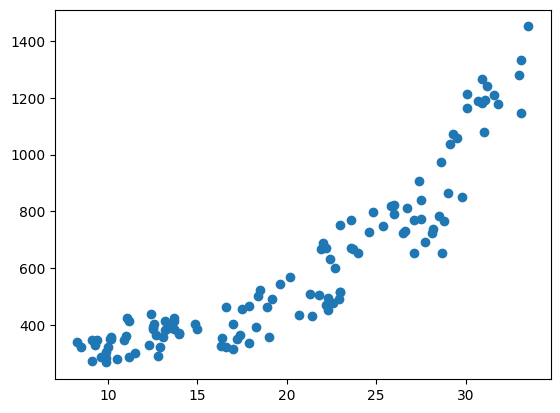

In [46]:
plt.scatter(x, y)

In [47]:
n = len(x)

In [48]:
def mean_squared_error(y, pred):
    return torch.sum((y - pred) ** 2) / n

In [49]:
def loss(a, b):
    pred = a * x + b
    return mean_squared_error(y, pred)

In [50]:
x = torch.tensor(x)
y = torch.tensor(y)

In [51]:
lr = 0.001
a = torch.tensor(30.0, requires_grad=True)
b = torch.tensor(0.0, requires_grad=True)

for i in range(100001):
    L = loss(a, b)
    L.backward()
    with torch.no_grad(): 
        a = a - lr * a.grad
        b = b - lr * b.grad
        
    a.requires_grad = True
    b.requires_grad = True
    if i % 10000 == 0:
        print('a:', a.item(), 'b:', b.item(), 'y:', L.item())


a: 30.48543930053711 b: -0.008699999190866947 y: 18489.1171875
a: 35.48957824707031 b: -114.21866607666016 y: 16499.017578125
a: 35.958866119384766 b: -125.0035171508789 y: 16482.396484375
a: 36.00316619873047 b: -126.02156829833984 y: 16482.24609375
a: 36.00708770751953 b: -126.11177062988281 y: 16482.248046875
a: 36.00708770751953 b: -126.11177062988281 y: 16482.248046875
a: 36.00708770751953 b: -126.11177062988281 y: 16482.248046875
a: 36.00708770751953 b: -126.11177062988281 y: 16482.248046875
a: 36.00708770751953 b: -126.11177062988281 y: 16482.248046875
a: 36.00708770751953 b: -126.11177062988281 y: 16482.248046875
a: 36.00708770751953 b: -126.11177062988281 y: 16482.248046875


In [52]:
import numpy as np

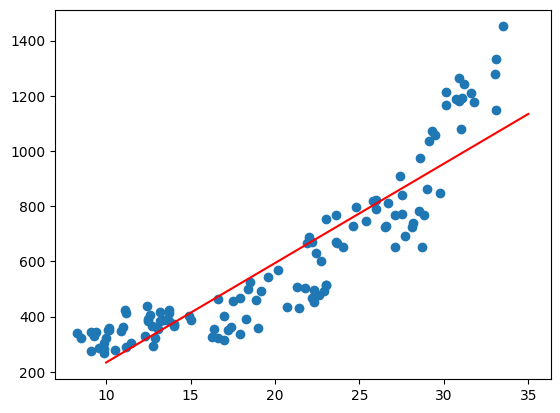

In [53]:
plt.scatter(x, y)
_x = np.linspace(10, 35, 1000)
plt.plot(_x, a.item() * _x + b.item(), color='red')